
# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

### Importing dataset

In [2]:
file_path = 'PhD MRI+CTA+MRS 208+166.xlsx'
sheet_name = 'MRI+CTA+MRS 161'

data = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
data.head()

,Name,COMPLETE,Stroke volume,PRN,age,gender,date of onset,time of onset,date of admission,date of discharge,...,Lt Supraclinoid ICA,Lt Proximal M1 MCA,Lt Distal M1 MCA,Lt M2MCA rear,Lt M2 MCA forward,Lt A1 ACA,clot burden score,Lt ICA origin,Rt ICA origin,CCA
0,pandurang salunkhe,1.0,0.053275,1.202058e+08,78.0,1,2023-09-01 00:00:00,11:50:00,2023-09-01 00:00:00,2023-09-04 00:00:00,...,1,2,2,1,1,1,17,NaN,NaN,NaN
1,Nathu Shelar,1.0,0.130765,2.304024e+08,70.0,1,NaN,NaN,2023-04-16 00:00:00,2023-04-20 00:00:00,...,2,2,2,1,1,1,20,1.0,1.0,Bilateral CCA plaques
2,Parshuram Shinde,1.0,0.266373,2.303053e+08,80.0,1,NaN,NaN,2023-03-27 00:00:00,NaN,...,2,2,2,1,1,1,20,1.0,1.0,NaN
3,LATIF MUNIR,0.0,0.305118,2.400000e+11,59.0,1,2024-04-26 00:00:00,0.875,2024-04-26 00:00:00,2024-04-27 00:00:00,...,2,2,2,1,1,1,19,1.0,1.0,NaN
4,Kale Dharmendra,1.0,0.363236,1.205029e+08,47.0,1,NaN,NaN,2023-02-13 00:00:00,2023-02-15 00:00:00,...,1,2,2,1,1,1,19,1.0,1.0,Left CCA plaque


In [4]:
data.shape

(166, 73)

In [5]:
data.isna().sum()

Name                   0
COMPLETE               6
Stroke volume          0
PRN                    7
age                    1
                    ... 
Lt A1 ACA              0
clot burden score      0
Lt ICA origin          3
Rt ICA origin          3
CCA                  134
Length: 73, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 73 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             166 non-null    object 
 1   COMPLETE                         160 non-null    float64
 2   Stroke volume                    166 non-null    float64
 3   PRN                              159 non-null    float64
 4   age                              165 non-null    float64
 5   gender                           166 non-null    int64  
 6   date of onset                    125 non-null    object 
 7   time of onset                    113 non-null    object 
 8   date of admission                165 non-null    object 
 9   date of discharge                143 non-null    object 
 10  cell1                            159 non-null    float64
 11  cell2                            57 non-null     float64
 12  NIHSS                 

In [7]:
data.nunique()

Name                 164
COMPLETE               2
Stroke volume        163
PRN                  130
age                   53
                    ... 
Lt A1 ACA              2
clot burden score     10
Lt ICA origin          2
Rt ICA origin          2
CCA                   17
Length: 73, dtype: int64

### Selecting features manually

In [8]:
data.columns

Index(['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
       'date of onset', 'time of onset', 'date of admission',
       'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'other investigations',
       'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
       'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
       'thrombolysis', 'thrombolytic agent', 'anticoagulation',
       'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
       'outcomes good 1 <=2; poor 2 >=3', 'barthel index',
       'Rt infraclinoid ICA', 'Rt Supraclinoid ICA', 'Rt Proximal M1 MCA',
       'Rt Distal M1 MCA', 'Rt M2MCA rear', 'Rt M2 MCA forward', 'Rt A1 A

In [9]:
# important_features = ['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
#        'date of onset', 'time of onset', 'date of admission',
#        'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
#        'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
#        'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
#        'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
#        'Triglycerides', 'V LDL', 'b 12', 'other investigations',
#        'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
#        'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
#        'thrombolysis', 'thrombolytic agent', 'anticoagulation',
#        'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
#        'barthel index', 'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
#        'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
#        'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
#        'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA', 'Lt Distal M1 MCA',
#        'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA', 'clot burden score',
#        'Lt ICA origin', 'Rt ICA origin', 'CCA']

In [10]:
important_features = ['Name', 'Stroke volume', 'age', 'gender','NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12',
       'CT ASPECTS', 'MITEFF', 'MCTA', 'mechanical thrombectomy', 
       'decompressive hemicranectomy','MRS',
       'clot burden score', 'Lt ICA origin', 'Rt ICA origin']
# TAN MAS CCA

In [11]:
# Remove 'MRS' and 'barthel index' from their current positions
important_features.remove('MRS')

# Append 'MRS' and 'barthel index' to the end
important_features.extend(['MRS'])

# Reorder the DataFrame columns
data = data[important_features]

In [12]:
data.head()

,Name,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,...,b 12,CT ASPECTS,MITEFF,MCTA,mechanical thrombectomy,decompressive hemicranectomy,clot burden score,Lt ICA origin,Rt ICA origin,MRS
0,pandurang salunkhe,0.053275,78.0,1,3.0,1.0,1,2,2,1,...,328.0,NaN,NaN,NaN,2.0,2.0,17,NaN,NaN,6
1,Nathu Shelar,0.130765,70.0,1,2.0,1.0,1,1,1,1,...,148.0,9.0,3.0,5.0,2.0,2.0,20,1.0,1.0,6
2,Parshuram Shinde,0.266373,80.0,1,24.0,2.0,2,2,1,2,...,197.0,9.0,3.0,5.0,NaN,NaN,20,1.0,1.0,6
3,LATIF MUNIR,0.305118,59.0,1,0.0,1.0,2,2,2,2,...,243.0,9.0,3.0,5.0,0.0,0.0,19,1.0,1.0,0
4,Kale Dharmendra,0.363236,47.0,1,0.0,1.0,2,2,2,2,...,NaN,10.0,3.0,4.0,NaN,NaN,19,1.0,1.0,6


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          166 non-null    object 
 1   Stroke volume                 166 non-null    float64
 2   age                           165 non-null    float64
 3   gender                        166 non-null    int64  
 4   NIHSS                         163 non-null    float64
 5   SHT                           165 non-null    float64
 6   DM                            166 non-null    int64  
 7   Alcohol                       166 non-null    int64  
 8   smoking                       166 non-null    int64  
 9   tobacco                       166 non-null    int64  
 10  dyslipidaemia                 166 non-null    int64  
 11  atrial fibrillation           166 non-null    int64  
 12  IHD                           151 non-null    float64
 13  rheum

- Storke Volume is Object , we need all the stroke volume as float

In [14]:
for index, value in data['Stroke volume'].items():
    # Check if each value can be converted to a float
    try:
        float(value)
    except ValueError:
        # If not a float, drop the row
        data.drop(index, inplace=True)

In [15]:
data.loc[:,'Stroke volume'] = pd.to_numeric(data['Stroke volume'], errors='coerce')

## Dealing with NULL values

In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isna().sum() / len(data)) * 100

# Filter only the columns that have missing values > 20%
missing_percentage = missing_percentage[missing_percentage > 20]

print(missing_percentage)

MCV                             45.783133
Cholesterol                     22.891566
HDL Cholesterol                 22.891566
Triglycerides                   31.927711
V LDL                           23.493976
mechanical thrombectomy         51.807229
decompressive hemicranectomy    50.602410
dtype: float64


- Checking Null Stroke Volume

In [16]:
data["Stroke volume"].isna().sum()

0

- Checking NULL MRS value

In [17]:
data['MRS'].isna().sum()

0

In [18]:
data.shape

(166, 33)

### Dropping NULL MRS and NULL Stroke Volume


In [19]:
data.dropna(subset=['MRS'], inplace=True)

In [20]:
data.shape

(166, 33)

In [21]:
data['Stroke volume'].isna().sum()

0

In [22]:
data.dropna(subset=['Stroke volume'],inplace =True)

In [23]:
data.drop(columns=["Name"], inplace=True)

In [24]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,...,b 12,CT ASPECTS,MITEFF,MCTA,mechanical thrombectomy,decompressive hemicranectomy,clot burden score,Lt ICA origin,Rt ICA origin,MRS
0,0.053275,78.0,1,3.0,1.0,1,2,2,1,2,...,328.0,NaN,NaN,NaN,2.0,2.0,17,NaN,NaN,6
1,0.130765,70.0,1,2.0,1.0,1,1,1,1,2,...,148.0,9.0,3.0,5.0,2.0,2.0,20,1.0,1.0,6
2,0.266373,80.0,1,24.0,2.0,2,2,1,2,2,...,197.0,9.0,3.0,5.0,NaN,NaN,20,1.0,1.0,6
3,0.305118,59.0,1,0.0,1.0,2,2,2,2,2,...,243.0,9.0,3.0,5.0,0.0,0.0,19,1.0,1.0,0
4,0.363236,47.0,1,0.0,1.0,2,2,2,2,2,...,NaN,10.0,3.0,4.0,NaN,NaN,19,1.0,1.0,6


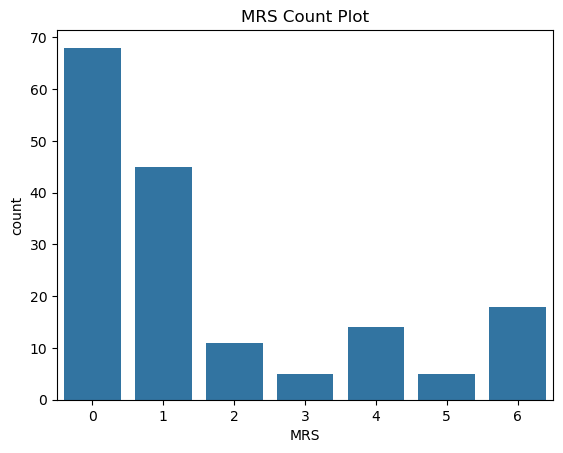

In [25]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [26]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

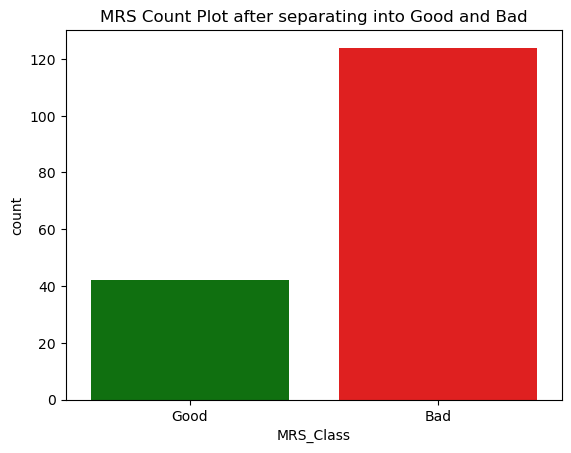

In [27]:
plt.figure()
plt.title('MRS Count Plot after separating into Good and Bad')

# Set the x variable to hue and use integer keys for the palette
sns.countplot(data=data, x='MRS_Class', hue='MRS_Class', palette={0: 'green', 1: 'red'}, legend=False)

# Set the custom x-tick labels
plt.xticks(ticks=[0, 1], labels=['Good', 'Bad'])

plt.show()

## Ajusting Binary Values

In [28]:
# Replace missing values with 0 and also convert 2.0 to 0 and 1.0 to 1
columns_to_modify = ['mechanical thrombectomy', 'decompressive hemicranectomy']

# Replace missing values with 0
data[columns_to_modify] = data[columns_to_modify].fillna(0)

# Replace 2.0 with 0 and 1.0 remains as 1
data[columns_to_modify] = data[columns_to_modify].replace(2.0, 0).replace(1.0, 1)

In [29]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [30]:
data.reset_index(inplace=True, drop=True)

In [31]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,...,CT ASPECTS,MITEFF,MCTA,mechanical thrombectomy,decompressive hemicranectomy,clot burden score,Lt ICA origin,Rt ICA origin,MRS,MRS_Class
0,0.053275,78.0,1,3.0,1.0,1,0,0,1,2,...,NaN,NaN,NaN,0.0,0.0,17,NaN,NaN,6,0
1,0.130765,70.0,1,2.0,1.0,1,1,1,1,2,...,9.0,3.0,5.0,0.0,0.0,20,1.0,1.0,6,0
2,0.266373,80.0,1,24.0,0.0,0,0,1,0,2,...,9.0,3.0,5.0,0.0,0.0,20,1.0,1.0,6,0
3,0.305118,59.0,1,0.0,1.0,0,0,0,0,2,...,9.0,3.0,5.0,0.0,0.0,19,1.0,1.0,0,1
4,0.363236,47.0,1,0.0,1.0,0,0,0,0,2,...,10.0,3.0,4.0,0.0,0.0,19,1.0,1.0,6,0


In [32]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

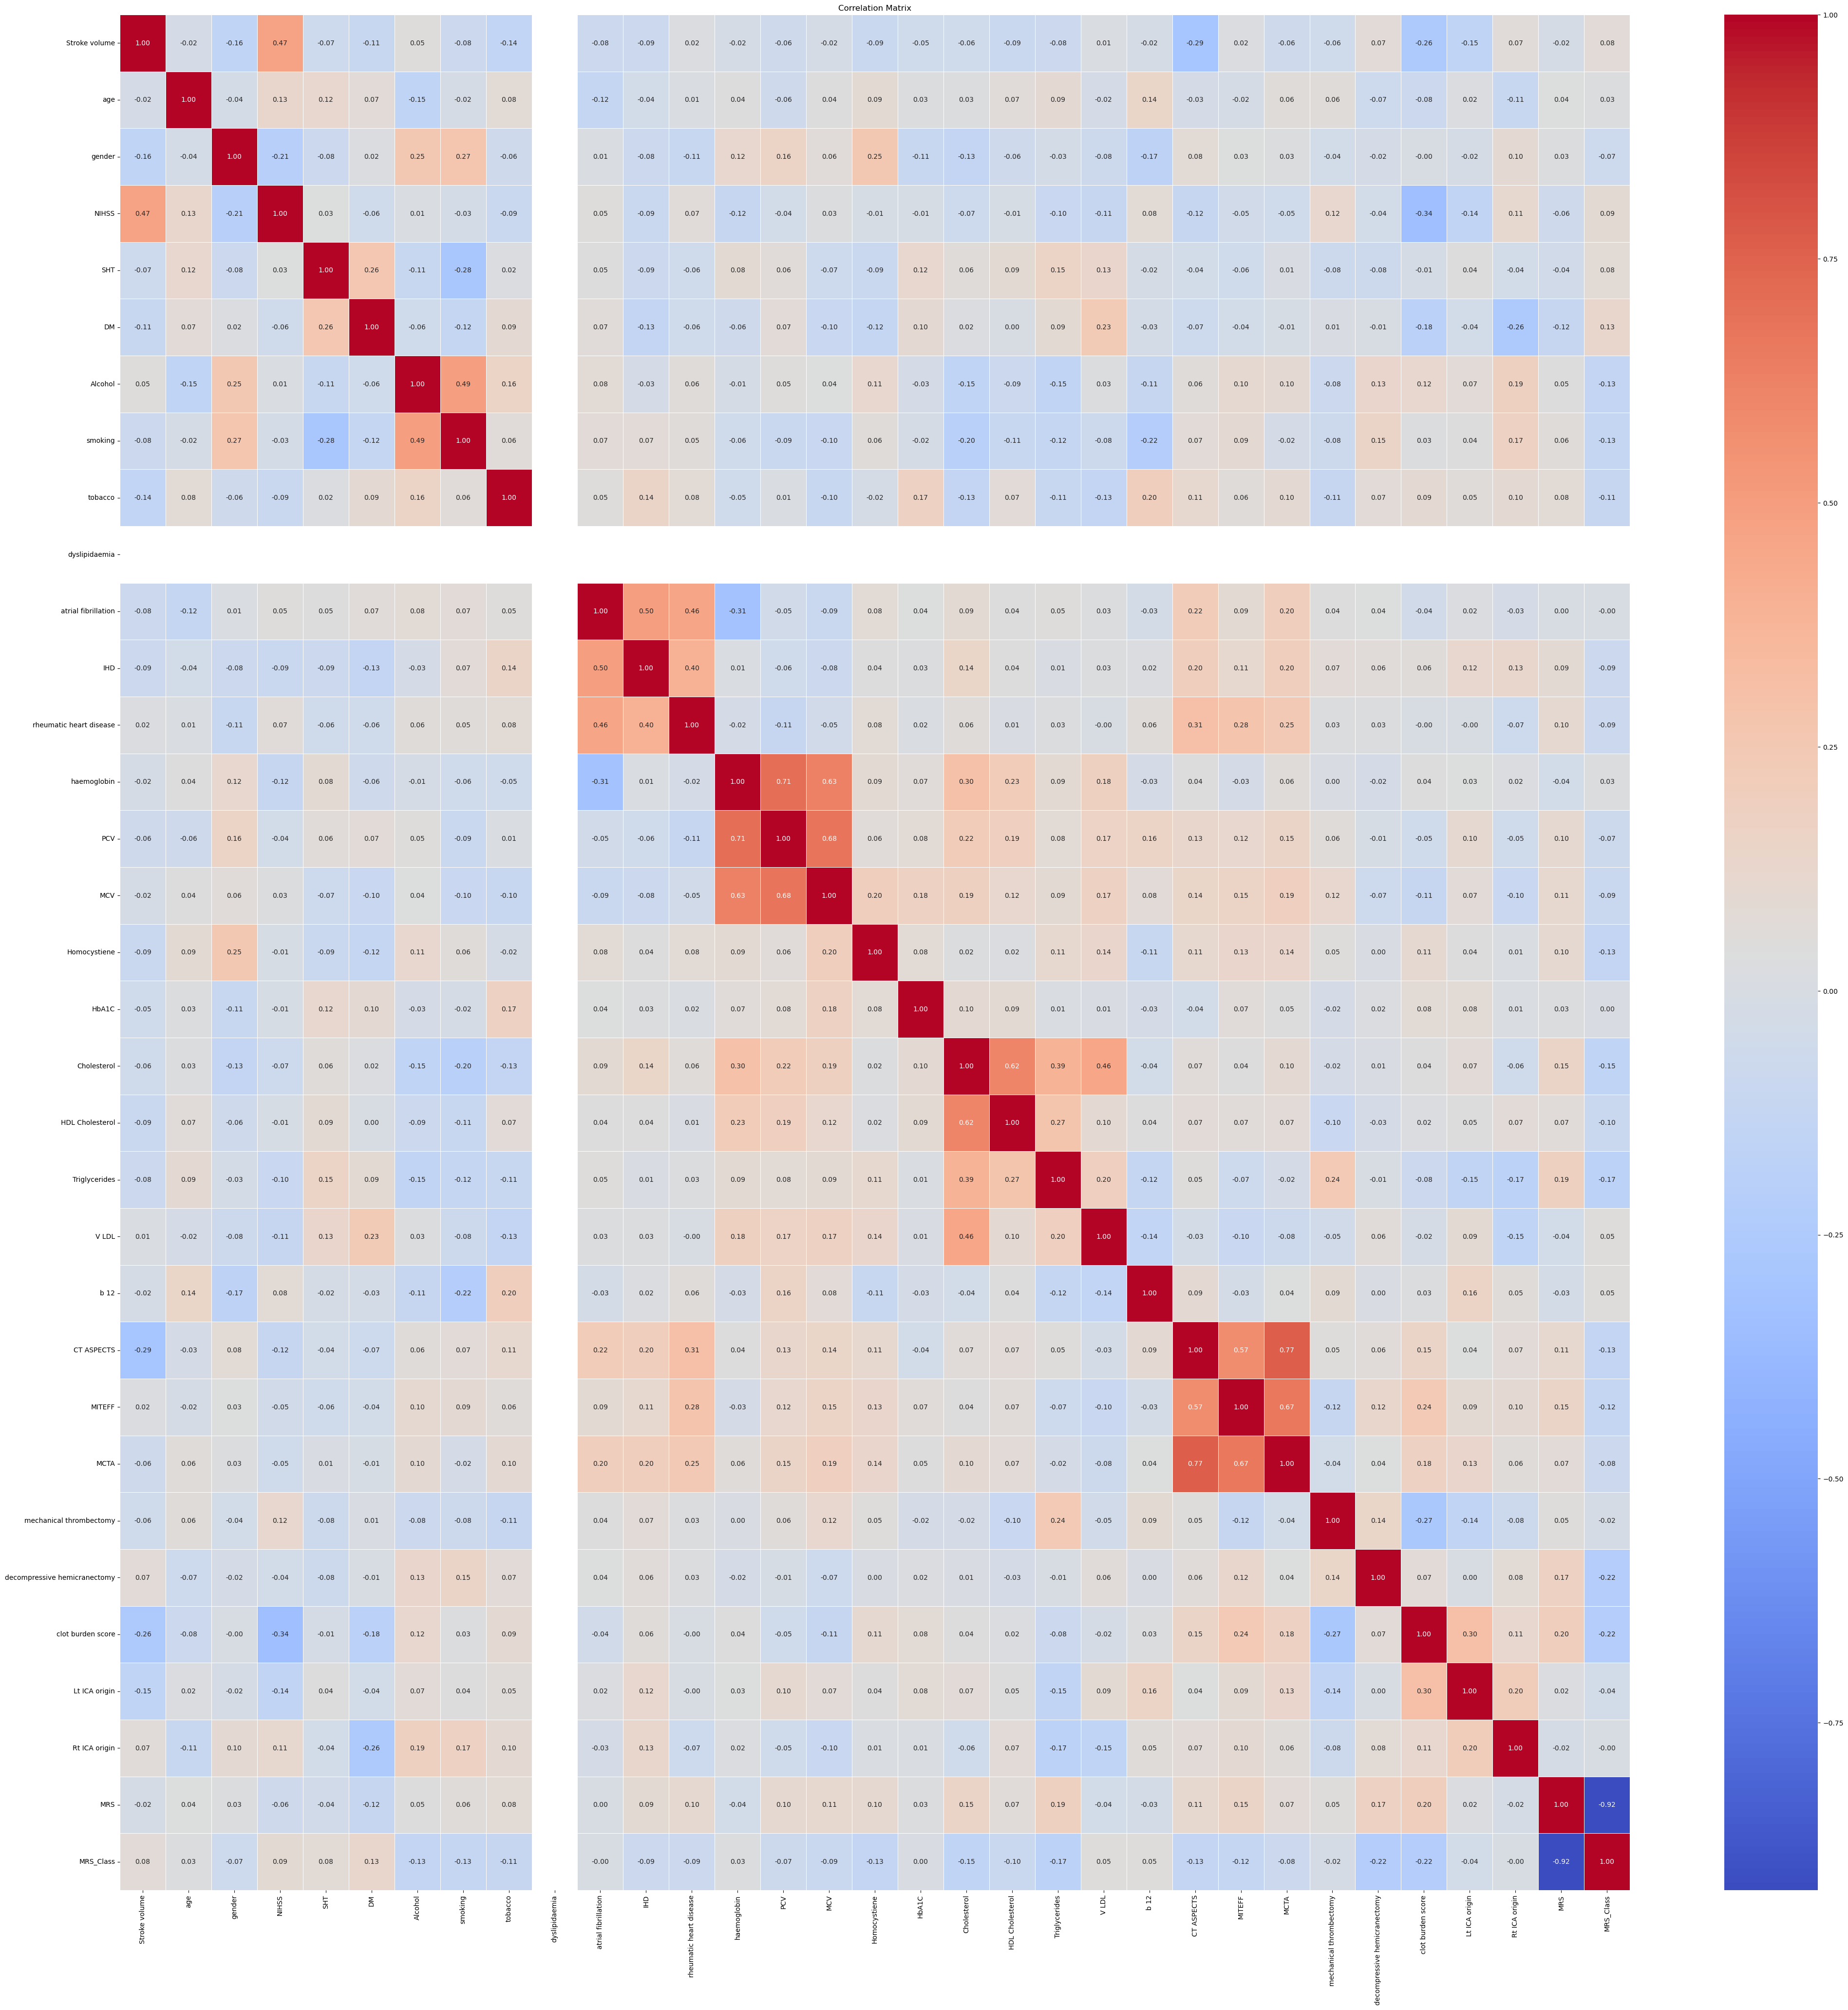

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [34]:
y = data.iloc[:,-1].values
X = data.drop(columns=["MRS", "MRS_Class"])
X = X.to_numpy()

In [35]:
y

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [36]:
X

array([[5.32746e-02, 7.80000e+01, 1.00000e+00, ..., 1.70000e+01,
                nan,         nan],
       [1.30765e-01, 7.00000e+01, 1.00000e+00, ..., 2.00000e+01,
        1.00000e+00, 1.00000e+00],
       [2.66373e-01, 8.00000e+01, 1.00000e+00, ..., 2.00000e+01,
        1.00000e+00, 1.00000e+00],
       ...,
       [1.78227e+00, 4.50000e+01, 1.00000e+00, ..., 2.00000e+01,
        1.00000e+00, 1.00000e+00],
       [7.10779e+01, 7.70000e+01, 0.00000e+00, ..., 1.70000e+01,
        1.00000e+00, 0.00000e+00],
       [2.40476e+02, 5.70000e+01, 0.00000e+00, ..., 1.50000e+01,
        1.00000e+00, 1.00000e+00]])

In [37]:
X.shape

(166, 31)

## Preprocessing Pipeline

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [39]:
data.isna().sum()

Stroke volume                    0
age                              1
gender                           0
NIHSS                            3
SHT                              1
DM                               0
Alcohol                          0
smoking                          0
tobacco                          0
dyslipidaemia                    0
atrial fibrillation              0
IHD                             15
rheumatic heart disease          0
haemoglobin                      6
PCV                             23
MCV                             76
Homocystiene                    16
HbA1C                           30
Cholesterol                     38
HDL Cholesterol                 38
Triglycerides                   53
V LDL                           39
b 12                            26
CT ASPECTS                       5
MITEFF                           4
MCTA                             4
mechanical thrombectomy          0
decompressive hemicranectomy     0
clot burden score   

In [40]:
# Identify binary features
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')

# Get indices of binary features in the DataFrame
binary_features_indices = [data.columns.get_loc(feature) for feature in binary_features]

# Create the binary transformer
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [41]:
data.columns[binary_features_indices]

Index(['gender', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
       'mechanical thrombectomy', 'decompressive hemicranectomy',
       'Lt ICA origin', 'Rt ICA origin'],
      dtype='object')

In [42]:
# Identify numeric features by excluding the binary features from the DataFrame
numeric_features = [col for col in data.columns if col not in binary_features]
# Remove both 'MRS_Class' and 'MRS' in a single line
numeric_features = [feature for feature in numeric_features if feature not in ['MRS_Class', 'MRS']]

# Get indices of numeric features in the DataFrame
numeric_features_indices = [data.columns.get_loc(feature) for feature in numeric_features]

# Create the numeric transformer
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [43]:
data.columns[numeric_features_indices]

Index(['Stroke volume', 'age', 'NIHSS', 'dyslipidaemia', 'atrial fibrillation',
       'IHD', 'rheumatic heart disease', 'haemoglobin', 'PCV', 'MCV',
       'Homocystiene', 'HbA1C', 'Cholesterol', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'CT ASPECTS', 'MITEFF', 'MCTA',
       'clot burden score'],
      dtype='object')

In [44]:
# Create the column transformer for the entire preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_indices),
        ("bin", binary_transformer, binary_features_indices),
    ]
)

In [45]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [46]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [47]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessing_pipeline),
        ('classifier', DecisionTreeClassifier())
    ]
)

## Cross Validation Pipeline

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [49]:
# Define parameters for GridSearchCV
param_grid = [
    # Parameters for Decision Tree
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10, None],
        'classifier__criterion': ['gini', 'entropy']
    },
    # Parameters for Random Forest
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 20, 30],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__bootstrap': [True]
    },
    # Parameters for AdaBoost
    {
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=3)]
    },
    # Parameters for Gradient Boosting
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__max_depth': [3, 5]
    },
    # Parameters for XGBoost
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.1, 0.01]
    },
    # Parameters for LGBM
    {
        'classifier': [LGBMClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.1, 0.01]
    },
    # Parameters for Bagging Classifier
    {
        'classifier': [BaggingClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=5)]
    }
]

In [50]:
# params = [param1, param2, param3, param4, param5, param6, param7]

In [51]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [52]:
# grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit=False, verbose=2)
# grid.fit(X, y)

In [53]:
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit='f1', verbose=2)
grid.fit(X, y)

Fitting 10 folds for each of 74 candidates, totalling 740 fits
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time= 

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier()

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           MinMaxScaler())]),
                                                                                          [0,
                                                                                           1,
                                                                                           3,
                                                                                           9,
                                                                                           10,
                                                                                           11,
                                                                                           12,
                                                                                           13,
                                                                                           14,
                                                                                           15,
                                                                                           16,
                                                                                           17,
                                                                                           18,
                                                                                           19,
                                                                                           20,
                                                                                           21,
                                                                                           22,
                                                                                           23,
                                                                                           24,
                                                                                           25,
                                                                                           28]),
                                                                                         ('bin',
                                                                                          Pipeline(steps=...
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.1, 0.01],
                          'classifier__max_depth': [3, 5, 10],
                          'classifier__n_estimators': [50, 100, 200]},
                         {'classifier': [BaggingClassifier()],
                          'classifier__estimator': [DecisionTreeClassifier(max_depth=5)],
                          'classifier__n_estimators': [50, 100]}],
             refit='f1',
             scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard',
                      'balanced_accuracy'],
             verbose=2)

In [54]:
import joblib

# Save the entire GridSearchCV object
grid_filename = 'GSCV_NOFS_MRI_CTA.pkl'
joblib.dump(grid, grid_filename)

print(f"Complete GridSearchCV model saved as '{grid_filename}'")

Complete GridSearchCV model saved as 'GSCV_NOFS_MRI_CTA.pkl'


In [55]:
print(grid.best_params_)

{'classifier': RandomForestClassifier(), 'classifier__bootstrap': True, 'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__n_estimators': 100}


In [56]:
print(grid.best_score_)

0.9308787748982651


In [57]:
from datetime import datetime

# List of scoring metrics used in GridSearchCV
scoring_metrics = ['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy']

# Extracting the parameter settings for each run and combining them into one column
params_summary = grid.cv_results_['params']
combined_params = [str(param_set) for param_set in params_summary]

# Creating an initial DataFrame with combined parameters
df = pd.DataFrame({'Parameters': combined_params})

# Adding mean scores for each scoring metric to the DataFrame
for metric in scoring_metrics:
    mean_score_key = f'mean_test_{metric}'
    
    if mean_score_key in grid.cv_results_:
        # Extract the mean scores and add to the DataFrame
        df[f'Mean {metric.capitalize()} Score'] = np.round_(grid.cv_results_[mean_score_key], 6)
    else:
        print(f"Metric '{metric}' not found in cv_results_")

# Sorting by F1 Score as it was the refit metric
df = df.sort_values(by='Mean F1 Score', ascending=False)

# Saving the DataFrame to an Excel file
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'MRS Prediction Results MRI CTA NO FS--' + current_datetime + '.xlsx'
df.to_excel(result_filename, index=False)

print(f"Results saved to {result_filename}")


Results saved to MRS Prediction Results MRI CTA NO FS--15-10-2024-04-20-39.xlsx


In [58]:
# Access the best estimator from the GridSearchCV
best_pipeline = grid.best_estimator_

# Access the feature selection step (RFE) from the pipeline
rfe_step = best_pipeline.named_steps['feature_selection']

# Get the mask of selected features (True for selected features)
selected_features_mask = rfe_step.support_

# Get the ranking of all features
feature_ranking = rfe_step.ranking_

# Print selected features and their rankings
print("Selected Features Mask:", selected_features_mask)
print("Feature Ranking:", feature_ranking)

# If you want the names of the features that were selected:
all_features = list(data.columns)  # Get all feature names from your data
selected_features = [feature for feature, selected in zip(all_features, selected_features_mask) if selected]

print("Selected Features:", selected_features)

KeyError: 'feature_selection'

## Confusion Matrix + Model Evaluation

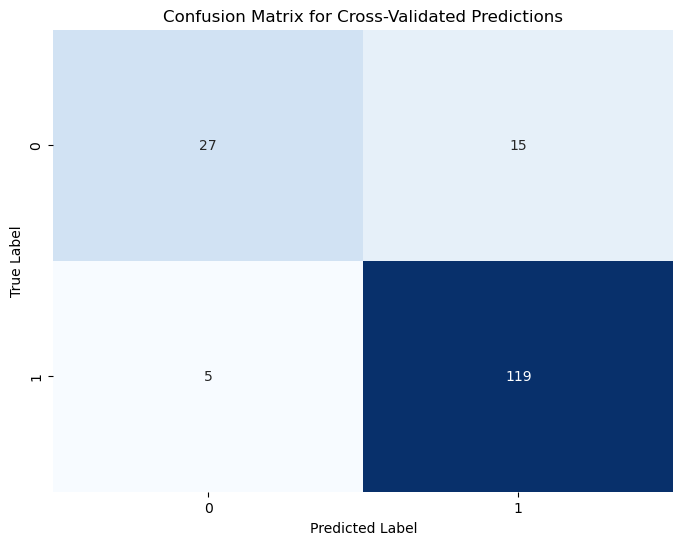


Classification Report for Cross-Validated Predictions:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        42
           1       0.89      0.96      0.92       124

    accuracy                           0.88       166
   macro avg       0.87      0.80      0.83       166
weighted avg       0.88      0.88      0.87       166


Cross-Validation F1 Scores: [0.92307692 1.         0.96296296 0.95652174 0.92307692 0.89655172
 0.7826087  0.91666667 1.         0.92857143]
Mean F1 Score from Cross-Validation: 0.9290037063275444
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 112, number of negative: 37
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0000

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

                        Model  Accuracy  F1 Score  Precision    Recall  \
0      RandomForestClassifier  0.879518  0.923077   0.882353  0.967742   
1           BaggingClassifier  0.879518  0.920000   0.912698  0.927419   
2               XGBClassifier  0.897590  0.932271   0.921260  0.943548   
3      DecisionTreeClassifier  0.861446  0.905350   0.924370  0.887097   
4  GradientBoostingClassifier  0.879518  0.920000   0.912698  0.927419   
5              LGBMClassifier  0.879518  0.920000   0.912698  0.927419   
6          AdaBoostClassifier  0.861446  0.908367   0.897638  0.919355   

    ROC AUC   Jaccard  Balanced Accuracy  
0  0.793395  0.857143           0.793395  
1  0.832757  0.851852           0.832757  
2  0.852727  0.873134           0.852727  
3  0.836406  0.827068           0.836406  
4  0.832757  0.851852           0.832757  
5  0.832757  0.851852           0.832757  
6  0.804916  0.832117           0.804916  
Metrics for top-performing unique models saved to 'Top_Unique_M

In [3]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, roc_auc_score, jaccard_score, balanced_accuracy_score, precision_score, make_scorer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

# Load the saved GridSearchCV object
grid_filename = 'GSCV_NOFS_MRI_CTA.pkl'
grid = joblib.load(grid_filename)

# Extract the best model from the loaded GridSearchCV object
best_model = grid.best_estimator_

# Load your cleaned data
# Note: Make sure to load the exact data you used for training so that the preprocessing steps match
data = pd.read_csv('Cleaned_Data.csv')

# Separate features and target variable
y = data.iloc[:, -1].values
X = data.drop(columns=["MRS", "MRS_Class"]).to_numpy()

# Handle missing values by imputing them
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

# Perform K-Fold cross-validation with 10 splits
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Use cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(best_model, X, y, cv=kf)

# Generate confusion matrix for cross-validated predictions
conf_matrix = confusion_matrix(y, y_pred)

# Plotting the confusion matrix and saving it as a high quality image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Cross-Validated Predictions')
plt.savefig('Confusion_Matrix_Best_Performing_Random_Forrest_MRI_CTA.png', dpi=300)
plt.show()

# Generate and print a detailed classification report for cross-validated predictions
classification_rep = classification_report(y, y_pred)
print("\nClassification Report for Cross-Validated Predictions:\n", classification_rep)

# Perform cross-validation on the best model to assess overfitting
# Cross-validate using 10 folds and the 'f1' scoring metric
cross_val_scores = cross_val_score(best_model, X, y, cv=kf, scoring='f1')
print("\nCross-Validation F1 Scores:", cross_val_scores)
print("Mean F1 Score from Cross-Validation:", np.mean(cross_val_scores))

# Extracting the top-performing instance of each model from GridSearchCV results
df_results = pd.DataFrame(grid.cv_results_)
df_results = df_results.sort_values(by='mean_test_f1', ascending=False)

# Get unique top-performing model instances
unique_models = df_results['param_classifier'].unique()
top_models = []

for model in unique_models:
    top_model = df_results[df_results['param_classifier'] == model].head(1)
    top_models.append(top_model)

# Concatenate all top-performing unique models
top_models_df = pd.concat(top_models)

# Initialize a list to store metrics for each unique top model
metrics_list = []

# Evaluate metrics for the top-performing unique models using cross-validation
for index, row in top_models_df.iterrows():
    # Extract the parameters for the model
    model_params = row['params']
    
    # Set the model with the corresponding parameters
    model = model_params['classifier']
    model.set_params(**{key.replace('classifier__', ''): value for key, value in model_params.items() if key.startswith('classifier__')})
    
    # Perform cross-validation and predict
    y_pred = cross_val_predict(model, X, y, cv=kf)
    
    # Calculate metrics
    metrics = {
        'Model': type(model).__name__,
        'Accuracy': accuracy_score(y, y_pred),
        'F1 Score': f1_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_pred),
        'Jaccard': jaccard_score(y, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y, y_pred)
    }
    metrics_list.append(metrics)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics_list)

# Display the metrics for the top-performing models
print(metrics_df)

# Save the metrics to an Excel file
metrics_filename = 'Top_Unique_Models_Metrics_MRI_CTA.xlsx'
metrics_df.to_excel(metrics_filename, index=False)
print(f"Metrics for top-performing unique models saved to '{metrics_filename}'")